In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import random

from dtw_client import Client
from dtw_server import Server

In [2]:
# Make Clients
client1 = Client('jihyeok')
client2 = Client('yujin')

# Make and load keys
client1.create_keys()
client1.load_keys()
client2.create_keys()
client2.load_keys()

# Set arguments
client1.set_args()
client2.set_args()

In [3]:
data = pd.read_csv('ptbdb_normal.csv').iloc[:, 1:].values
df = pd.DataFrame(data, columns=[f'p{i}' for i in range(1, data.shape[1]+1)])
df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p178,p179,p180,p181,p182,p183,p184,p185,p186,p187
0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,0.086931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,0.113108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,0.134911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,0.066602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,0.195343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,0.181778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


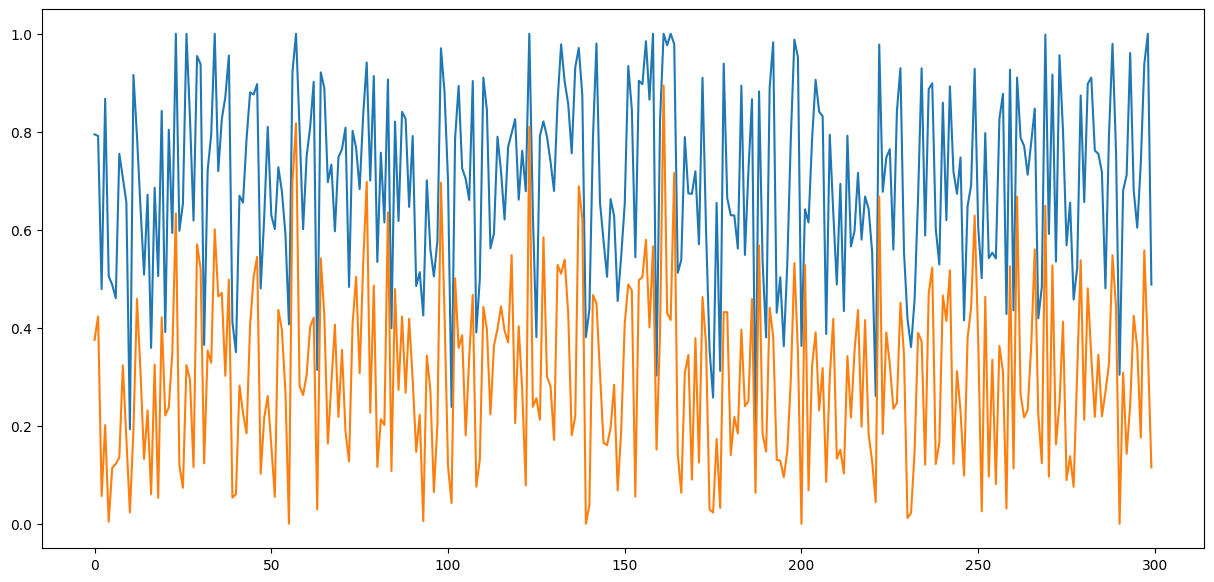

In [4]:
# Visualization: Comparing distribution
# Set target index
id1, id2 = 0, 1

# Set time range
start = 000
end = 300

plt.figure(figsize=(15,7))
plt.plot(df.iloc[:,id1][start:end])
plt.plot(df.iloc[:,id2][start:end])
plt.show()

In [5]:
# Encrypt data using client's context

# Person 1: jihyeok
pid = 1 # 원하는 index로 설정
data_1 = []
for i in range(0, 4000, 800):
    data = df.iloc[i:i+100, pid].values
    encrypted_data = client1.encrypt(data)
    data_1.append(encrypted_data)

# Person 2: yujin
pid = 4 # 원하는 index로 설정
data_2 = []
for i in range(0, 4000, 800):
    data = df.iloc[i:i+100, pid].values
    encrypted_data = client2.encrypt(data)
    data_2.append(encrypted_data)

In [6]:
# Make Server
server = Server()

# Client에서 서버에 정보 전달 및 저장
# 계산 객체(eval) 전송
server.save_eval('jihyeok', client1.eval) # 최초 1번
server.save_eval('yujin', client2.eval) # 최초 1번

# 거리계산에 필요한 인자 전송
server.save_args('jihyeok', client1.args) # 최초 1번
server.save_args('yujin', client2.args) # 최초 1번

# 인증용 데이터 전송
server.save_data('jihyeok', data_1) # 최초 1번
server.save_data('yujin', data_2) # 최초 1번

In [7]:
# 본인인증
sid = 0 # 원하는 index로 설정 (<100)
encrypted_result1 = server.identification('jihyeok', data_1[sid])
encrypted_result2 = server.identification('jihyeok', data_2[sid])
encrypted_result3 = server.identification('yujin', data_1[sid])
encrypted_result4 = server.identification('yujin', data_2[sid])

100%|█████████████████████████████████████████████████████████████| 100/100 [04:54<00:00,  2.94s/it]


TypeError: compare(): incompatible function arguments. The following argument types are supported:
    1. (eval: piheaan.HomEvaluator, op1: piheaan.Ciphertext, op2: piheaan.Ciphertext, res: piheaan.Ciphertext, numiter_g: int = 8, numiter_f: int = 3) -> None

Invoked with: <piheaan.HomEvaluator object at 0x14ed50170>, (level: 10, log(num slots): 15, data: [ (1.013916+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ]), [ (0.300000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ], (level: 10, log(num slots): 15, data: [ (1.013916+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ])

In [ ]:
# Client로 결과 전송 후 Client측에서 복호화
decrypted_result1 = server.check_result(encrypted_result1)
decrypted_result2 = server.check_result(encrypted_result2)
decrypted_result3 = server.check_result(encrypted_result3)
decrypted_result4 = server.check_result(encrypted_result4)